In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *
import os

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [13]:
season = ""
episode = ""
scene = ""
data = []
with open("data/all_scripts.txt") as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith(">> "):
            season = int(line[10:12])
            episode = line[3:]
            continue
        if line.startswith("> "):
            scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([season, episode, scene, character, line])
lines_df = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])
lines_df

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...,...
51287,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you."
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51289,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


In [14]:
# how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. 
# You can use a Pandas dataframe with a season column and a scene count column as the response.

# Logic: count lines per scene per episode per season > Each line corresponds to a scene
# Reset index so that each scene has its own index
# count scenes per season = groupby.count
# show only the scene column
lines_df.groupby(['Season', 'Episode','Scene']).count().reset_index().groupby(['Season']).count()[['Scene']]

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [15]:
all_characters = lines_df['Character'].unique()

nb_lines_per_char = lines_df['Character'].value_counts()
recurrent_characters = nb_lines_per_char[nb_lines_per_char > 90]
print("There are", len(recurrent_characters), "recurrent characters")
print(recurrent_characters)
print("Man is obviously not a recurrent character, it could be multiple characters")
recurrent_characters = recurrent_characters.drop('Man')

There are 20 recurrent characters
Character
Sheldon         11689
Leonard          9829
Penny            7677
Howard           5872
Raj              4779
Amy              3472
Bernadette       2690
Stuart            733
Priya             222
Mrs Cooper        213
Emily             164
Beverley          162
Mrs Wolowitz      136
Zack              135
Arthur            130
Wil               126
Leslie            116
Kripke            106
Man               105
Bert               95
Name: count, dtype: int64
Man is obviously not a recurrent character, it could be multiple characters


In [16]:
lines_df_updated = lines_df.loc[lines_df['Character'].isin(recurrent_characters.index)]
lines_df_updated

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
5,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"One across is Aegean, eight down is Nabakov, t..."
...,...,...,...,...,...
51284,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Uh, breakfast yes, lunch no. I did have a coug..."
51286,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,How thoughtful. Thank you.
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [17]:
def clean_line(line):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, " ")
    return line.lower()

lines_df_updated['Line'] = lines_df_updated['Line'].apply(lambda x: clean_line(x))
lines_df_updated

C:\Users\orian\AppData\Local\Temp\ipykernel_38548\2876178097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_df_updated['Line'] = lines_df_updated['Line'].apply(lambda x: clean_line(x))


,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me
5,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...
...,...,...,...,...,...
51284,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a coug...
51286,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,how thoughtful thank you
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,and i with you question are you seeking a ro...
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,well that would raise a number of problems w...


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [18]:
# combine every line
corpus = []
for _, row in lines_df_updated.iterrows():
    corpus.append(list(row['Line'].split(" ")))
# Flatten the corpus list
corpus_flat = []
for i in range(len(corpus)):
    corpus_flat += corpus[i]

corpus_flat = pd.Series(corpus_flat)
corpus_frequency = corpus_flat.value_counts()

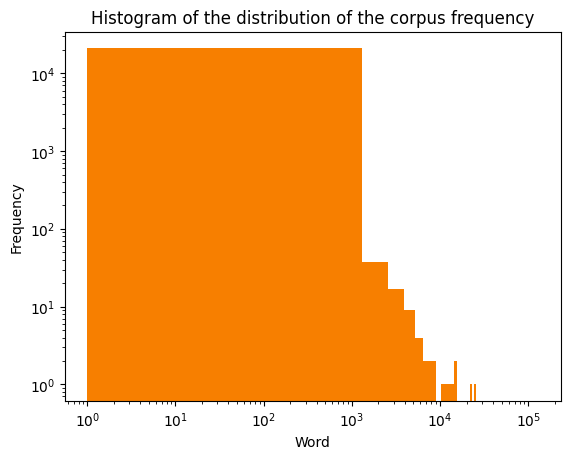

In [19]:
plt.hist(corpus_frequency, bins=100, color="#f77f00")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Histogram of the distribution of the corpus frequency")
plt.show()

The appropriate scale is a log scale for both x and y axis as the corpus frequency follows a power law distribution.

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [20]:
lines_df_updated['Words'] = lines_df_updated['Line'].apply(lambda x: len(x.split()))
words_per_character = lines_df_updated.groupby(['Character']).sum()['Words']
words_per_character.sort_values(ascending=False)

C:\Users\orian\AppData\Local\Temp\ipykernel_38548\2646675623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_df_updated['Words'] = lines_df_updated['Line'].apply(lambda x: len(x.split()))


Character
Sheldon         185388
Leonard         102496
Penny            79270
Howard           69505
Raj              60099
Amy              39933
Bernadette       27726
Stuart            7955
Mrs Cooper        3389
Beverley          2029
Priya             1940
Wil               1678
Emily             1571
Mrs Wolowitz      1459
Arthur            1451
Zack              1427
Leslie            1249
Kripke            1246
Bert              1146
Name: Words, dtype: int64

Based on the number of words, Sheldon seems to be the most talkative character

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [21]:
# Median is a robust statistic metric
words_per_character_per_episode = lines_df_updated.groupby(['Character','Episode']).sum()['Words']
words_per_character_per_episode.groupby(level='Character').median().sort_values(ascending=False)

# i) The first 2 characters are the same, Sheldon and Leonard are the most talkative in every single episode. The order of the other characters
# is very different from Q5. Some character can be very talkative overall but only appear or talk a lot in some episodes.

# ii) This analysis is much more precise and takes into account variation between episodes and therefore the time on screen per character. To go 
# even further, we could consider variation between scenes.

Character
Sheldon         775.0
Leonard         397.0
Arthur          325.0
Penny           323.0
Mrs Cooper      293.5
Howard          289.0
Amy             234.0
Raj             219.0
Bert            199.0
Beverley        184.0
Kripke          162.0
Bernadette      157.0
Priya           145.0
Zack            139.5
Wil             122.5
Leslie          121.0
Stuart          112.5
Emily            87.0
Mrs Wolowitz     39.0
Name: Words, dtype: float64

In [22]:
# iii) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this 
# twice improved method is really more talkative than the second most talkative one? Hint: Read the question again. A good idea would be to use 
# bootstrapping and calculate your summary statistic on each bootstrapped set.
words_per_character_per_scene = lines_df_updated.groupby(['Character','Scene']).sum()['Words']
words_per_character_per_scene.groupby(level='Character').median().sort_values(ascending=False)


Character
Mrs Cooper      142.5
Beverley        137.5
Bert            127.0
Sheldon         121.0
Arthur          105.0
Leslie           69.0
Leonard          69.0
Penny            67.0
Zack             67.0
Howard           66.0
Amy              66.0
Bernadette       61.0
Raj              58.0
Kripke           57.5
Wil              56.0
Priya            44.0
Emily            40.0
Stuart           40.0
Mrs Wolowitz     25.0
Name: Words, dtype: float64

In [23]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    medians = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians[i] = np.median(bootstrap_sample)
        
    lower_bound = np.percentile(medians, 2.5)
    upper_bound = np.percentile(medians, 97.5)
    
    return (lower_bound, upper_bound)

In [24]:
print("95% CI for Mrs Cooper, the first most talkative character after 2 improvements",bootstrap_confidence_interval(words_per_character_per_scene['Mrs Cooper']))
print("95% CI for Beverley, the second most talkative character after 2 improvements",bootstrap_confidence_interval(words_per_character_per_scene['Beverley']))

print("Both CI overlap so we cannot be completely confident that Mrs Cooper is more talkative than Beverley")

95% CI for Mrs Cooper, the first most talkative character after 2 improvements (91.5, 183.0)
95% CI for Beverley, the second most talkative character after 2 improvements (42.5, 180.5)
Both CI overlap so we cannot be completely confident that Mrs Cooper is more talkative than Beverley


### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [25]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *
from scipy.sparse import csr_matrix
from pyspark.ml.feature import CountVectorizer

sc = SparkContext(appName="BagOfWordsAggregation")

input_file = "data/all_scripts.txt"
raw_rdd = sc.textFile(input_file)

# Step 1: Extract (speaker, dialogue) pairs for recurrent characters
def parse_line(line):
    if line.startswith(">>") or line.startswith(">"):
        return None  # Skip stage directions or meta-information
    if ":" in line:
        speaker, dialogue = line.split(":", 1)
        speaker = speaker.strip()
        dialogue = dialogue.strip()
        if speaker in recurrent_characters:
            return (speaker, dialogue)
    return None
parsed_rdd = raw_rdd.map(parse_line).filter(lambda x: x is not None)

# Step 2: Create a flat RDD of all dialogue lines (to build vocabulary)
all_dialogues = parsed_rdd.map(lambda x: x[1])

# Step 3: Build the vocabulary and vectorize dialogue lines using CountVectorizer
from pyspark.sql import SQLContext
from pyspark.sql import Row

sql_context = SQLContext(sc)

# Convert RDD to DataFrame for CountVectorizer
rows = parsed_rdd.map(lambda x: Row(speaker=x[0], dialogue=x[1]))
dataframe = sql_context.createDataFrame(rows, schema=["speaker", "dialogue"])

# Fit CountVectorizer to the dialogue lines
vectorizer = CountVectorizer(inputCol="dialogue", outputCol="features", vocabSize=10000)
model = vectorizer.fit(dataframe)

# Transform the dialogues to bag-of-words vectors
vectorized_data = model.transform(dataframe)

# Extract the vocabulary
vocabulary = model.vocabulary

# Step 4: Convert to (speaker, bag-of-words vector) RDD
def row_to_rdd(row):
    speaker = row["speaker"]
    vector = row["features"].toArray()  # Convert sparse vector to dense numpy array
    return (speaker, csr_matrix(vector))

bow_rdd = vectorized_data.rdd.map(row_to_rdd)

# Step 5: Aggregate bag-of-words vectors for each speaker
aggregated_rdd = bow_rdd.reduceByKey(lambda v1, v2: v1 + v2)

# Final output: (speaker, aggregated bag-of-words vector)
def format_output(speaker_vector):
    speaker, vector = speaker_vector
    dense_vector = vector.toarray().flatten()  # Convert CSR to dense
    return (speaker, dense_vector)

final_rdd = aggregated_rdd.map(format_output)

# Save or collect the output
output_file = "path_to_output_file.txt"
final_rdd.saveAsTextFile(output_file)

# Stop the SparkContext
sc.stop()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=BagOfWordsAggregation, master=local[*]) created by __init__ at C:\Users\orian\AppData\Local\Temp\ipykernel_38548\791656091.py:8 

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [29]:
# Drop Mrs. Cooper and Mrs Wolowitz
filter_recurrent_character = recurrent_characters.drop(['Mrs Cooper', 'Mrs Wolowitz'])
lines_filter_taskC = lines_df_updated.loc[lines_df_updated['Character'].isin(filter_recurrent_character.index)]
lines_filter_taskC

,Season,Episode,Scene,Character,Line,Words
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...,57
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point,5
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...,16
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me,2
5,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...,39
...,...,...,...,...,...,...
51284,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a coug...,21
51286,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,how thoughtful thank you,4
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,and i with you question are you seeking a ro...,13
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,well that would raise a number of problems w...,21


In [74]:
character_per_scene = lines_filter_taskC[['Scene', 'Character']]
character_per_scene = character_per_scene.groupby('Scene')['Character'].apply(lambda x: list(set(x)))

n = len(filter_recurrent_character)
A_familiarity = np.zeros((n,n), dtype=int)
for scene in character_per_scene.index:
    for i in range(n):
        for j in range(n):
            if filter_recurrent_character.index[i] in character_per_scene[scene] and filter_recurrent_character.index[j] in character_per_scene[scene]:
                A_familiarity[i][j] +=1
                continue

np.fill_diagonal(A_familiarity, 0)
print(A_familiarity)

import networkx as nx
G_familiarity = nx.from_numpy_array(A_familiarity, parallel_edges=False, create_using=nx.Graph())
print(G_familiarity)

[[  0 409 270 265 230 135  76  44  24  12  11  14   9  16  12  16   8]
 [409   0 274 269 234  96  71  40  28  13  12  15   5  14  11  13   7]
 [270 274   0 150 133 123  96  32  17  11  12  14   3  13   8   6   7]
 [265 269 150   0 260  75 121  49  16  15  10  15   3  13   9  11   9]
 [230 234 133 260   0  74  82  48  18  22   9  13   4  14   8  13   9]
 [135  96 123  75  74   0  93  30  13  12  10  11   3  11   3   6   8]
 [ 76  71  96 121  82  93   0  39  14  15  11   9   1   9   5   6   6]
 [ 44  40  32  49  48  30  39   0   6   9   7   7   1   8   2   3   4]
 [ 24  28  17  16  18  13  14   6   0   3   3   2   1   1   3   2   2]
 [ 12  13  11  15  22  12  15   9   3   0   2   4   1   6   2   3   4]
 [ 11  12  12  10   9  10  11   7   3   2   0   3   1   4   3   2   2]
 [ 14  15  14  15  13  11   9   7   2   4   3   0   1   5   1   3   3]
 [  9   5   3   3   4   3   1   1   1   1   1   1   0   1   1   1   1]
 [ 16  14  13  13  14  11   9   8   1   6   4   5   1   0   2   3   3]
 [ 12 

In [143]:
import re
character_per_scene = lines_filter_taskC[['Scene', 'Character', 'Line']]
character_per_scene['Gossip'] = character_per_scene['Line'].apply(lambda x: list(set(char for char in filter_recurrent_character.index if re.search(rf'\b{re.escape(char.lower())}\b', x))))
character_per_scene_gossip = character_per_scene[character_per_scene['Gossip'].apply(len) > 0]

n = len(filter_recurrent_character)
A_gossip = np.zeros((n,n), dtype=int)

for index, row in character_per_scene_gossip.iterrows():
    for i in range(n):
        for j in range(n):
            if filter_recurrent_character.index[i] == row['Character'] and filter_recurrent_character.index[j] in row['Gossip']:
                A_gossip[i][j] += 1

print(A_gossip)
G_gossip = nx.from_numpy_array(A_gossip, parallel_edges=False, create_using=nx.DiGraph())
print(G_gossip)

C:\Users\orian\AppData\Local\Temp\ipykernel_38548\3221428237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_per_scene['Gossip'] = character_per_scene['Line'].apply(lambda x: list(set(char for char in filter_recurrent_character.index if re.search(rf'\b{re.escape(char.lower())}\b', x))))


[[134 693 403 145 102 319  43  43  11   7   4   9  18  53   8  40  17]
 [609  67 338 182 133  70  32  42  26   4   2  14   4  12  22  12   6]
 [457 403  37  87  79 132  52  15  22   8   1  19   2   3   2   1   6]
 [197 106  66  40 126  21 102  28   4  16   0   1   0   1   9   2   3]
 [153  84  78 115  14  28  46  31   9  46   0   2   0   5   2   4   5]
 [364  71  88  21   4  23  52  10   7   0   0  12   2   6   0   5  15]
 [ 62  38  45 102  60  38   5  32   6   9   0   0   0   0   0   0   1]
 [ 24  13   9  16   7   2   9   6   0   0   0   0   0   6   0   0   0]
 [ 16  25   4   6   2   0   4   0   0   0   0   0   0   0   0   0   0]
 [  1   1   1   1   8   0   0   0   0   1   0   0   0   0   0   0   0]
 [ 11  13   2   2   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   9   0   0   0   0   0   0   0   0   2   0   0   0   0   0]
 [ 11   1   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0]
 [ 16   5   5   1   0   1   0   0   0   0   0   0   0   3   0   0   0]
 [  9 

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

The longest shortest path of the familiarity graph is 1 which means that every character in the show is familiar with everyone


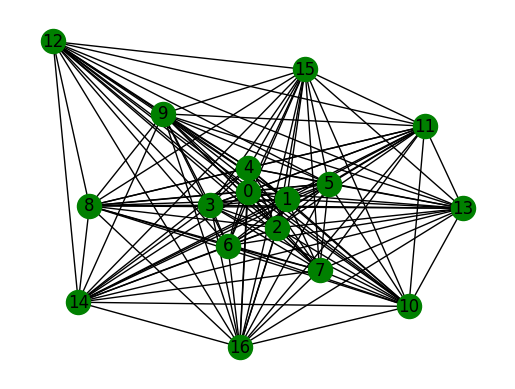

In [157]:
print("The longest shortest path of the familiarity graph is",nx.diameter(G_familiarity),"which means that every character in the show is familiar with everyone")

def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')
visualize_graph(G_familiarity)

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [163]:
# node with the highest betweenness centrality
nx.betweenness_centrality(G_familiarity)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0}

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [170]:
def is_complete_directed_graph(G):
    n = len(G.nodes)
    for i in G.nodes:
        for j in G.nodes:
            if i != j:
                if not G.has_edge(i, j) or not G.has_edge(j, i):
                    return False
    return True

# Check if the directed graph is complete
is_complete_directed = is_complete_directed_graph(G_gossip)
print(is_complete_directed)

# NOT every recurrent character in the show gossips about all the other recurrent characters

False


In [167]:
nx.is_strongly_connected(G_gossip)
#for every pair of recurrent characters, at least one gossips about the other?

True

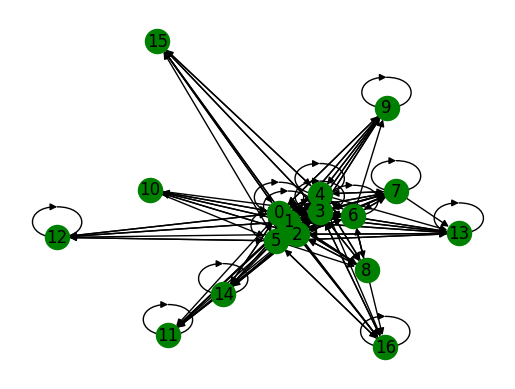

In [166]:
visualize_graph(G_gossip)

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [200]:
train = lines_df_updated.loc[lines_df_updated['Season'] <= 8]
X_train = train[['Line']]
y_train = train[['Character']]
test = lines_df_updated.loc[lines_df_updated['Season'] > 8]
X_test = test[['Line']]
y_test = test[['Character']]

from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = []
with open("helpers/stopwords.txt") as f:
    for line in f.readlines():
        stopwords.append(line)

vectorizer = TfidfVectorizer(tokenizer=simple_tokeniser, max_features=150, stop_words=stopwords)
tfidf_train = vectorizer.fit_transform(X_train).toarray()
tfidf_test = vectorizer.fit_transform(X_test).toarray()


c:\Anaconda\envs\ada\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Anaconda\envs\ada\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'did', 'do', 'does', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'm', 'me', 'more', 'most', 'my', 'myself', 'no', 'nope', 'nor', 'not', 'now', 'of', 'off', 'oh', 'ok', 'okay', 'on', 'once', 'only', 'or', 'other', 'our', 'ou

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [201]:
words_character = lines_df_updated[['Character', 'Line']]
words_character['Words'] = words_character['Line'].apply(lambda x: list(set(x.split()))) 

words_sheldon = []
for i, row in words_character.iterrows():
    if row['Character'] == 'Sheldon':
        words_sheldon.append(row['Words'])

words_sheldon_flat = []
for i in range(len(words_sheldon)):
    words_sheldon_flat += words_sheldon[i]

words_sheldon_flat

C:\Users\orian\AppData\Local\Temp\ipykernel_38548\2809945857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_character['Words'] = words_character['Line'].apply(lambda x: list(set(x.split())))


['through',
 'not',
 'so',
 'target',
 'will',
 'and',
 'directed',
 'it',
 'two',
 'slits',
 'either',
 'hits',
 'go',
 'is',
 'in',
 'its',
 'a',
 'unobserved',
 'slit',
 'however',
 'observed',
 'gone',
 'if',
 's',
 'the',
 'before',
 'photon',
 'both',
 'but',
 'after',
 'plane',
 'have',
 'left',
 'with',
 'i',
 'it',
 'for',
 'tee',
 'shirt',
 'no',
 'think',
 's',
 'good',
 'point',
 'there',
 'a',
 'idea',
 'just',
 'i',
 'is',
 'think',
 'the',
 'this',
 'place',
 'i',
 't',
 'can',
 'leonard',
 'think',
 'don',
 'do',
 'this',
 'i',
 'offspring',
 'generate',
 'to',
 'think',
 'fuddruckers',
 'hostesses',
 'same',
 'dna',
 'sperm',
 'sister',
 'basic',
 'is',
 'no',
 'about',
 'guarantee',
 'there',
 'a',
 'at',
 'iq',
 'we',
 'committing',
 's',
 'the',
 'are',
 'fraud',
 'our',
 'who',
 'high',
 'going',
 'mix',
 'have',
 'genetic',
 'with',
 'that',
 'i',
 'for',
 'under',
 'her',
 'to',
 'toddler',
 'know',
 'or',
 'faster',
 'and',
 'differential',
 'curve',
 'sperm',
 

In [202]:
def contains_sheldon_words(line):
    for word in words_sheldon_flat:
        if word in line.split():
            return True
    return False

In [205]:
test_pred = X_test["Line"].apply(contains_sheldon_words)
test_true = test["Character"] == "Sheldon"

print("Accuracy: ", (test_true == test_pred).sum() / len(test_true))

Accuracy:  0.22175238469859376


**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._